In [268]:
# Drop columns from df_new
df_1 = df_new.drop(columns=['Volatility_30D', 'Volatility_12M', 'Monthly Change'])

# Display the updated DataFrame
df_1

,Opening Price,Highest Price,Lowest Price,Closing Price,Adjusted Closing Price,Trading Volume,Dividend per Share
Month_Date,,,,,,,
2025-03-11,254.735,266.4500,245.1823,248.95,248.9500,36040964,0.00
2025-02-28,252.400,265.7200,246.5400,252.44,252.4400,94123851,1.67
2025-01-31,221.820,261.8000,214.6100,255.70,253.9983,92424171,0.00
2024-12-31,227.500,239.3500,217.6523,219.83,218.3670,81535689,0.00
2024-11-29,207.770,230.3600,204.0700,227.41,225.8966,77280587,1.67
...,...,...,...,...,...,...,...
2015-05-29,173.200,176.3000,168.8400,169.65,106.0846,57916093,1.30
2015-04-30,160.230,175.1303,158.3900,171.29,106.2975,93821213,0.00
2015-03-31,161.680,165.3500,153.4000,160.50,99.6016,104899758,0.00


In [269]:
### 1. **Log Returns Calculation:**
## Calculate the log returns of the stock prices. Log returns are essential for modeling and are often stationary, which is useful for GARCH modeling.

import pandas as pd
import numpy as np

df_1['Log_Returns'] = np.log(df_1['Closing Price'] / df_1['Closing Price'].shift(1))
df_1.dropna(inplace=True)  # Drop missing values


In [270]:

### 2. **ADF Test for Stationarity:**
## Perform the Augmented Dickey-Fuller (ADF) test to check if the time series is stationary. If the p-value is less than 0.05, the series is stationary.

from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df_1['Log_Returns'].dropna())
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

# Interpretation
if adf_test[1] < 0.05:
    print("The data is stationary. Proceeding with GARCH modeling.")
else:
    print("The data is NOT stationary. Consider differencing or transformations.")
    

ADF Statistic: -12.532017485441381
p-value: 2.4169148342580584e-23
The data is stationary. Proceeding with GARCH modeling.


In [271]:
##3. Train-Test Split:

In [272]:
df_1 = df_1.sort_index()


In [273]:
# Ensure the DateTimeIndex is sorted
#df_1 = df_1.sort_index()

# Split data into train and test (assume '2024-01-31' is the cutoff date for training)
train_data = df_1.loc[:'2024-01-31']
test_data = df_1.loc[:'2024-02-01']

# Check the splits
print(f"Training Data:\n{train_data.tail()}")
print(f"Testing Data:\n{test_data.head()}")


Training Data:
            Opening Price  Highest Price  Lowest Price  Closing Price  \
Month_Date                                                              
2023-09-29         147.26       151.9299       139.610         140.30   
2023-10-31         140.04       144.7600       135.870         144.64   
2023-11-30         145.00       158.6000       144.450         158.56   
2023-12-29         158.41       166.3400       158.000         163.55   
2024-01-31         162.83       196.9000       157.885         183.66   

            Adjusted Closing Price  Trading Volume  Dividend per Share  \
Month_Date                                                               
2023-09-29                132.9956        82806487                0.00   
2023-10-31                137.1097        94386980                0.00   
2023-11-30                152.0067        78460252                1.66   
2023-12-29                156.7904        87358302                0.00   
2024-01-31                176

In [274]:
train_data

,Opening Price,Highest Price,Lowest Price,Closing Price,Adjusted Closing Price,Trading Volume,Dividend per Share,Log_Returns
Month_Date,,,,,,,,
2015-01-30,161.31,163.3100,149.520,153.31,94.4765,117395861,0.00,-0.054764
2015-02-27,154.00,164.9900,151.510,161.94,100.4952,77654705,1.10,0.008932
2015-03-31,161.68,165.3500,153.400,160.50,99.6016,104899758,0.00,-0.065064
2015-04-30,160.23,175.1303,158.390,171.29,106.2975,93821213,0.00,0.009621
2015-05-29,173.20,176.3000,168.840,169.65,106.0846,57916093,1.30,0.042075
...,...,...,...,...,...,...,...,...
2023-09-29,147.26,151.9299,139.610,140.30,132.9956,82806487,0.00,-0.030465
2023-10-31,140.04,144.7600,135.870,144.64,137.1097,94386980,0.00,-0.091885
2023-11-30,145.00,158.6000,144.450,158.56,152.0067,78460252,1.66,-0.030986


In [276]:
### 4. **Fit GARCH Model on Training Data:**
##Fit the GARCH model using the training data (log returns).

from arch import arch_model

# Scale log returns to avoid convergence issues
train_data.loc[:, 'Scaled_Log_Returns'] = train_data['Log_Returns'] * 100


# Re-fit the GARCH model
garch_model = arch_model(train_data['Scaled_Log_Returns'], vol='Garch', p=1, q=1, mean='Zero', dist='normal')
garch_result = garch_model.fit(disp='off')
print(garch_result.summary())



                       Zero Mean - GARCH Model Results                        
Dep. Variable:     Scaled_Log_Returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.009
Vol Model:                      GARCH   Log-Likelihood:               -360.425
Distribution:                  Normal   AIC:                           726.851
Method:            Maximum Likelihood   BIC:                           734.925
                                        No. Observations:                  109
Date:                Wed, Mar 12 2025   Df Residuals:                      109
Time:                        22:31:11   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          1.6396      4.860      0.337      0.736 

In [278]:

### 5. **Extract GARCH Volatility:**
##Once the model is fitted, extract the conditional volatility (GARCH volatility) from the fitted model for further analysis.

# Extract GARCH volatility for the training data
train_data.loc[:,'GARCH_Volatility'] = garch_result.conditional_volatility


In [279]:
train_data['GARCH_Volatility']

Month_Date
2015-01-30    5.588099
2015-02-27    5.643806
2015-03-31    5.697186
2015-04-30    5.748361
2015-05-29    5.797444
                ...   
2023-09-29    7.062274
2023-10-31    7.063705
2023-11-30    7.065089
2023-12-29    7.066428
2024-01-31    7.067723
Name: GARCH_Volatility, Length: 109, dtype: float64

In [280]:
train_data

,Opening Price,Highest Price,Lowest Price,Closing Price,Adjusted Closing Price,Trading Volume,Dividend per Share,Log_Returns,Scaled_Log_Returns,GARCH_Volatility
Month_Date,,,,,,,,,,
2015-01-30,161.31,163.3100,149.520,153.31,94.4765,117395861,0.00,-0.054764,-5.476388,5.588099
2015-02-27,154.00,164.9900,151.510,161.94,100.4952,77654705,1.10,0.008932,0.893195,5.643806
2015-03-31,161.68,165.3500,153.400,160.50,99.6016,104899758,0.00,-0.065064,-6.506408,5.697186
2015-04-30,160.23,175.1303,158.390,171.29,106.2975,93821213,0.00,0.009621,0.962054,5.748361
2015-05-29,173.20,176.3000,168.840,169.65,106.0846,57916093,1.30,0.042075,4.207536,5.797444
...,...,...,...,...,...,...,...,...,...,...
2023-09-29,147.26,151.9299,139.610,140.30,132.9956,82806487,0.00,-0.030465,-3.046491,7.062274
2023-10-31,140.04,144.7600,135.870,144.64,137.1097,94386980,0.00,-0.091885,-9.188517,7.063705
2023-11-30,145.00,158.6000,144.450,158.56,152.0067,78460252,1.66,-0.030986,-3.098568,7.065089


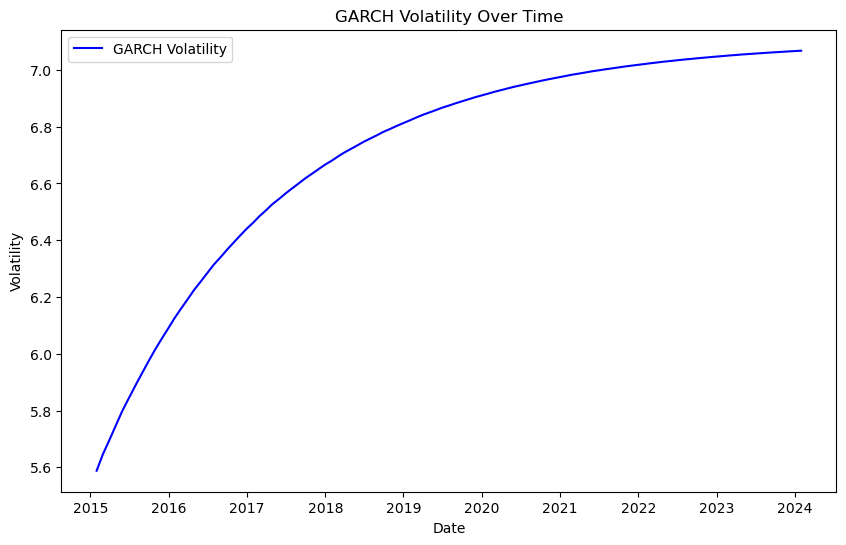

In [281]:

### 6. **Plot GARCH Volatility:**
##Visualize the historical volatility estimated by the GARCH model. This plot helps in identifying volatility clustering patterns (periods of high and low volatility).

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['GARCH_Volatility'], label='GARCH Volatility', color='blue')
plt.title('GARCH Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


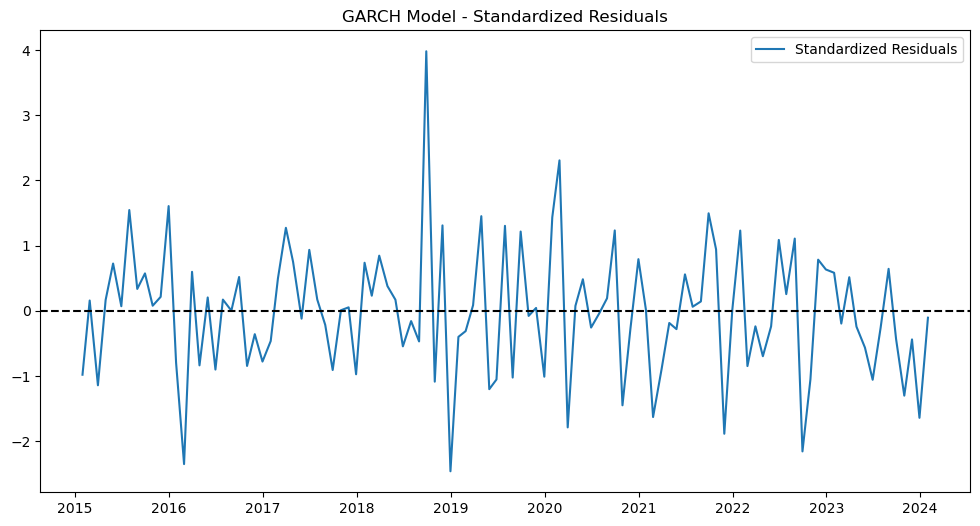

In [283]:

### 7. **Standardized Residuals Plot:**
##Plot the standardized residuals of the GARCH model to check for any patterns. Ideally, residuals should look like white noise.

# Standardized residuals
train_data.loc[:,'GARCH_Residuals'] = garch_result.resid / garch_result.conditional_volatility

plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['GARCH_Residuals'], label="Standardized Residuals")
plt.axhline(y=0, color='black', linestyle='--')
plt.title("GARCH Model - Standardized Residuals")
plt.legend()
plt.show()


In [284]:

### 8. **Shapiro-Wilk Test for Normality of Residuals:**
## Perform the Shapiro-Wilk test to check if the residuals are normally distributed.

from scipy.stats import shapiro

stat, p_value = shapiro(train_data['GARCH_Residuals'].dropna())
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"p-value: {p_value}")

# Interpretation: If p-value > 0.05, the residuals are normally distributed


Shapiro-Wilk Test Statistic: 0.9744886159896851
p-value: 0.034292466938495636


In [285]:

### 9. **Ljung-Box Test for Autocorrelation:**
## Perform the Ljung-Box test to check for autocorrelation in the residuals. The goal is to have residuals with no significant autocorrelation.

from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform Ljung-Box test on residuals
lb_test = acorr_ljungbox(train_data['GARCH_Residuals'].dropna(), lags=10)
print(f"Ljung-Box Test Results:\n{lb_test}")


Ljung-Box Test Results:
      lb_stat  lb_pvalue
1    1.874394   0.170973
2    2.180279   0.336170
3    3.216037   0.359501
4    3.259617   0.515356
5    3.450360   0.630912
6    4.069990   0.667205
7    4.858130   0.677271
8    5.363952   0.718062
9   10.172407   0.336709
10  15.906914   0.102328


In [286]:

### 10. **KMeans Clustering of GARCH Volatility:**
## Cluster the GARCH volatility into different groups using KMeans clustering. This helps identify different volatility regimes (e.g., low volatility, high volatility).

import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

# Clustering GARCH volatility
volatility_data = train_data['GARCH_Volatility'].values.reshape(-1, 1)

# Find optimal number of clusters (k)
best_k = 0
best_score = -1

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(volatility_data)
    score = silhouette_score(volatility_data, kmeans.labels_)
    if score > best_score:
        best_score = score
        best_k = k

print(f"Optimal K based on Silhouette Score: {best_k} with a score of {best_score}")


Optimal K based on Silhouette Score: 2 with a score of 0.7065893405657216


In [287]:
# Check for NaN values in the GARCH Volatility
print(train_data['GARCH_Volatility'].isna().sum())


0


In [288]:
# Drop NaN values
train_data_clean = train_data.dropna(subset=['GARCH_Volatility'])
volatility_data_clean = train_data_clean['GARCH_Volatility'].values.reshape(-1, 1)


C:\Users\warshape\AppData\Local\Temp\ipykernel_13296\3170220572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Volatility_Cluster'] = kmeans.labels_


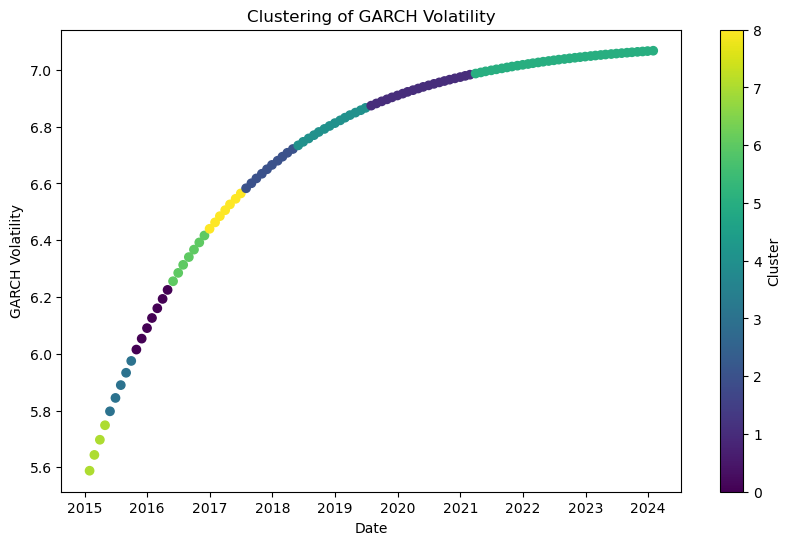

In [289]:
# Assign the cluster labels to the dataframe
train_data['Volatility_Cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(train_data.index, train_data['GARCH_Volatility'], c=train_data['Volatility_Cluster'], cmap='viridis')
plt.title('Clustering of GARCH Volatility')
plt.xlabel('Date')
plt.ylabel('GARCH Volatility')
plt.colorbar(label='Cluster')
plt.show()


In [290]:

### 11. **Generate Future Dates for Forecasting:**
## Generate the future dates for forecasting based on the last date in your dataset.

# Get the last date from the DataFrame
last_date = df_1.index[-1]

# Specify the number of future periods to forecast
forecast_periods = 34

# Generate future dates
future_dates = pd.date_range(start=last_date, periods=forecast_periods + 1, freq='ME')[1:]
print(f"Future Dates: {future_dates}")


Future Dates: DatetimeIndex(['2025-03-31', '2025-04-30', '2025-05-31', '2025-06-30',
               '2025-07-31', '2025-08-31', '2025-09-30', '2025-10-31',
               '2025-11-30', '2025-12-31', '2026-01-31', '2026-02-28',
               '2026-03-31', '2026-04-30', '2026-05-31', '2026-06-30',
               '2026-07-31', '2026-08-31', '2026-09-30', '2026-10-31',
               '2026-11-30', '2026-12-31', '2027-01-31', '2027-02-28',
               '2027-03-31', '2027-04-30', '2027-05-31', '2027-06-30',
               '2027-07-31', '2027-08-31', '2027-09-30', '2027-10-31',
               '2027-11-30', '2027-12-31'],
              dtype='datetime64[ns]', freq='ME')


In [291]:

### 12. **Forecasting Volatility with GARCH:**
## Generate forecasts for volatility over the future period using the fitted GARCH model. The forecast will give you the expected future volatility.

# Generate the forecast for the specified horizon (next 34 periods)
garch_forecast = garch_result.forecast(horizon=forecast_periods)

# Extract forecasted volatility (convert variance to standard deviation)
forecasted_variance = garch_forecast.variance[-1:]
forecasted_volatility = np.sqrt(forecasted_variance)

# Convert forecasted volatility to DataFrame
forecasted_volatility_df = pd.DataFrame(forecasted_volatility.values.flatten(), index=future_dates, columns=["Forecasted Volatility"])
print(forecasted_volatility_df)


            Forecasted Volatility
2025-03-31               7.068976
2025-04-30               7.070188
2025-05-31               7.071360
2025-06-30               7.072494
2025-07-31               7.073591
2025-08-31               7.074653
2025-09-30               7.075680
2025-10-31               7.076673
2025-11-30               7.077634
2025-12-31               7.078563
2026-01-31               7.079462
2026-02-28               7.080332
2026-03-31               7.081174
2026-04-30               7.081988
2026-05-31               7.082776
2026-06-30               7.083538
2026-07-31               7.084275
2026-08-31               7.084988
2026-09-30               7.085678
2026-10-31               7.086346
2026-11-30               7.086992
2026-12-31               7.087616
2027-01-31               7.088221
2027-02-28               7.088805
2027-03-31               7.089371
2027-04-30               7.089918
2027-05-31               7.090448
2027-06-30               7.090960
2027-07-31    

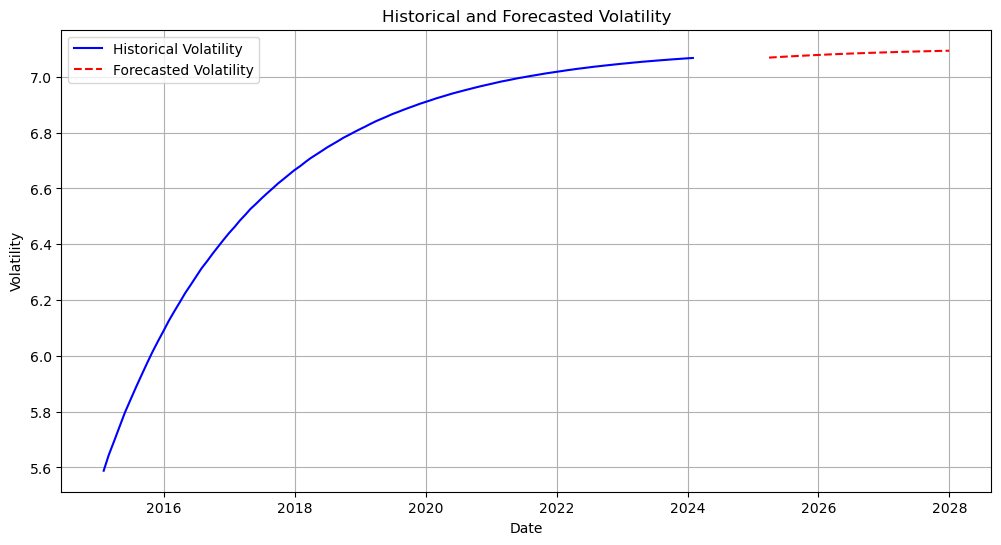

In [292]:
### 13. Plot Historical and Forecasted Volatility:
## Visualize the historical and forecasted volatility to compare them and see how volatility is expected to evolve in the future.

plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['GARCH_Volatility'], label='Historical Volatility', color='blue')
plt.plot(future_dates, forecasted_volatility_df['Forecasted Volatility'], label='Forecasted Volatility', color='red', linestyle='--')
plt.title('Historical and Forecasted Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

14. Train/Test Split for Forecast Evaluation:

In [259]:

# Assuming garch_result is your trained GARCH model
garch_forecast = garch_fit.forecast(horizon=len(test_data))

# The forecasted volatility is the square root of the forecasted variance
forecasted_volatility = np.sqrt(garch_forecast.variance.values[-1, :])

# Compare forecasted volatility with actual test data (if you're forecasting volatility)
# Since the test data consists of log returns, you'll need to compute volatility from those returns
# For simplicity, let's assume you have actual volatility data for the test period
# You would need to calculate the volatility from the test_data, typically using rolling std or other methods

# Here, we'll assume test_data is volatility itself (you may need to calculate actual volatility if needed)
actual_volatility = test_data  # Assuming test_data already represents volatility (or use a rolling std)

# Calculate Mean Absolute Error (MAE) for volatility forecasting
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actual_volatility, forecasted_volatility)

# Print MAE
print(f"Mean Absolute Error of the forecast: {mae}")


Mean Absolute Error of the forecast: 6.787002868962783


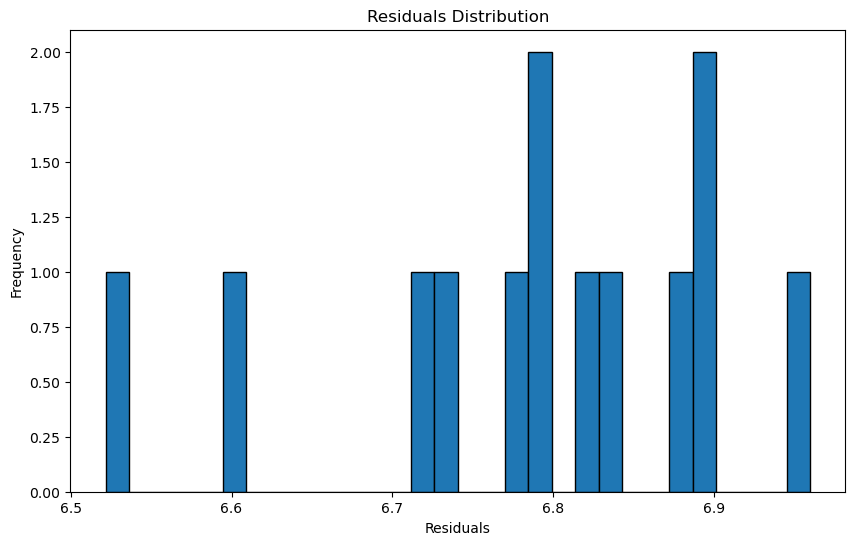

In [260]:
residuals = forecasted_volatility - actual_volatility
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [261]:
# Calculate VaR at a 95% confidence level
VaR_95 = np.percentile(forecasted_volatility, 5)
print(f"95% Value at Risk (VaR): {VaR_95}")


95% Value at Risk (VaR): 6.622230880045534


In [263]:

# Calculate MSE, RMSE, and MAE
mse = mean_squared_error(test_data, forecasted_volatility)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, forecasted_volatility)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')


Mean Squared Error (MSE): 46.07724505684656
Root Mean Squared Error (RMSE): 6.788022175630141
Mean Absolute Error (MAE): 6.787002868962783
